## Lab 6 Math 119A
#### SIR model for an infectious disease
$S$ is the number (in millions) of suceptible people, $I$ is the number (in millions) of infectious people, and $R$ is the number (in millions) of recovered and immune people. If we ignore births and deaths, the equations that describe the changes in these populations are:
$$ S'=-a SI/P_0\quad I'=a SI/P_0 - b I\qquad R'=b I$$
We will assume that our total population is $P_0=330$ million people. We start with 100 infected people, $I(0)=\frac{100}{1,000,000}=0.0001$, $S(0)=P_0-I(0)=329.9999$ million people and $R(0)=0$. (No one has recovered yet.)

Note that if we do not choose to track $R$ the number of recovered people, that the change equations for $S$ and $I$ are defined only in terms of each other.

## Part 1: Trajectories

Throughout this lab, examples will be given from the Romeo and Juliet model. We start by plotting a vector field:

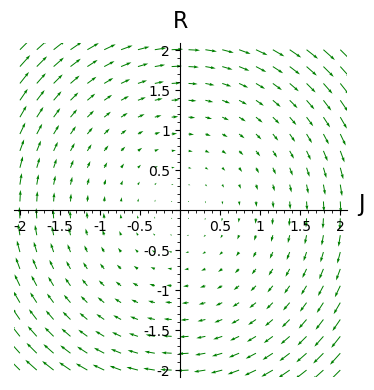

In [6]:
var("J,R")
Jprime(J,R)=R               # formula for J'
Rprime(J,R)=-J              # formula for R'
pvf=plot_vector_field([Jprime,Rprime],(J,-2,2),(R,-2,2),color="green",axes_labels=["J","R"],frame=False,aspect_ratio=1)  # makes a vector field plot
show(pvf)                   # displays vector field plot

**Exercise 1.** For the SIR model, with $a=1/6$ and $b=1/20$, plot a vector field in the $SI$-plane with $S$ values going from $0$ to $350$ and $I$ values going from $0$ to $200$.

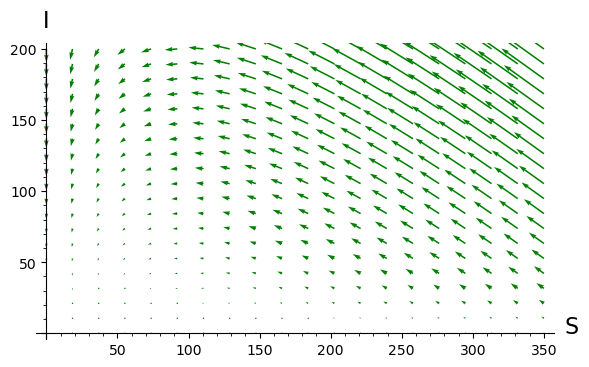

In [5]:
var("S,I")
a=1/6
b=1/20
P0=330
Sprime(S,I)=(-a*S*I)/P0
Iprime(S,I)=(a*S*I)/P0-b*I
vec1=plot_vector_field([Sprime,Iprime], (S,0,350), (I,0,200), color="green", axes_labels=["S","I"], frame=False, aspect_ratio=1)
show(vec1)

**Exercise 2.** Using the CoCalc functions `point()` and `text()` which were introduced in Lab 5, add the following labeled points to your vector field:

1. A point near the beginning of the disease where the number of susceptible people is high and the number of infectious people is low. Label this point "Outbreak Start".

2. Follow the arrows of the vector field and estimate the highest point of the trajectory starting from your first point. Add this high point to the vector field and label it "Max I". This represents the maximum number of people infected by the disease at a single time.

3. Following the trajectory you are imagining down to the $S$-axis and add a point near where you think it would intersect the $S$-axis. Label this point "Outbreak Ends". This point represents the end of the disease, when there are no more infected people.

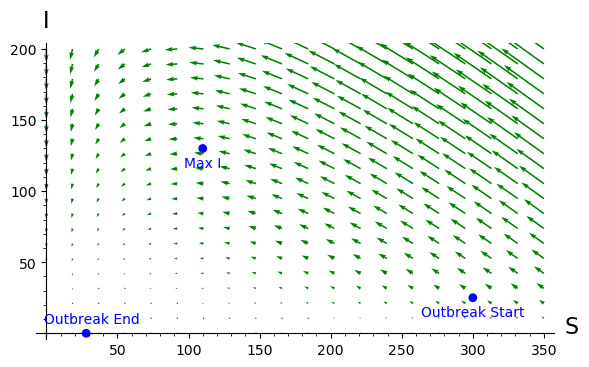

In [1]:
var("S,I") a=1/6 b=1/20 P0=330 Sprime(S,I)=(-a*S*I)/P0 Iprime(S,I)=(a*S*I)/P0-b*I vec1=plot_vector_field([Sprime,Iprime], (S,0,350), (I,0,200), color="green", axes_labels=["S","I"], frame=False, aspect_ratio=1)+point([300,25], color="blue", size=40)+text("Outbreak Start", [300,25-10])+point([110,130], color="blue", size=40)+text("Max I", [110, 130-10])+point([28,0], color="blue", size=40)+text("Outbreak End", [32, 10]) show(vec1)

From the above exercise you should have gotten an idea of how the number of susceptible and number of infected people change over the course of the disease (i.e. you have an idea of what the trajectory looks like). In the next few exercises we will plot a trajectory to see if it matches your intuition.

**Exercise 3.** Add the point $I(0)=0.0001$, $S(0)=P_0-I(0)=329.9999$ to your vector field and label it "Start". These correspond to 100 initial infected people and just under 330 million susceptible people.

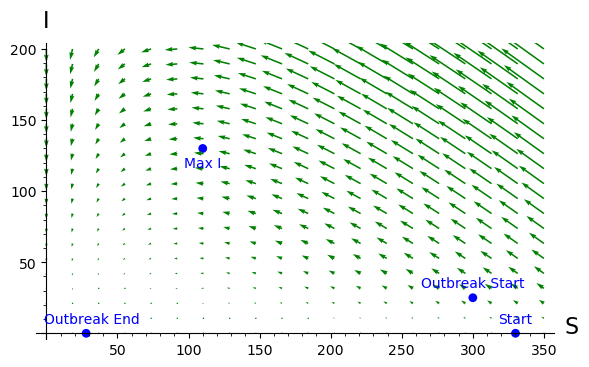

In [2]:
var("S,I") a=1/6 b=1/20 P0=330 Sprime(S,I)=(-a*S*I)/P0 Iprime(S,I)=(a*S*I)/P0-b*I vec1=plot_vector_field([Sprime,Iprime], (S,0,350), (I,0,200), color="green", axes_labels=["S","I"], frame=False, aspect_ratio=1)+point([300,25], color="blue", size=40)+text("Outbreak Start", [300,25+10])+point([110,130], color="blue", size=40)+text("Max I", [110, 130-10])+point([28,0], color="blue", size=40)+text("Outbreak End", [32, 10])+point([329.999,.0001], color="blue", size=40)+text("Start", [329.999, .0001+10]) show(vec1)

We are now going to create a trajectory starting from the point in the previous exercise. To do this we will use our Euler2D function from Lab 3:

In [3]:
def Euler2D(Xprime,Yprime,X0,Y0,t_end,dt):
    Xlist=[X0]          # starts list for X values
    Ylist=[Y0]          # starts list for Tvalues
    X=X0                # initial value for X
    Y=Y0                # initial value for Y
    for t in srange(dt,t_end,dt,include_endpoint=true):  # loops thru time values after tstart
        Xp=Xprime(X,Y)  # gives derivative X' at (X,Y)
        Yp=Yprime(X,Y)  # gives derivative Y' at (X,Y)
        dX=dt*Xp        # computes delta X
        dY=dt*Yp        # computes delta Y
        X=X+dX          # finds new X value
        Y=Y+dY          # finds new Y value
        Xlist.append(X) # apends new X value to Xlist
        Ylist.append(Y) # apends new Y value to Ylist
    XYlist=[Xlist,Ylist]# Combines Xlist and Ylist to make a list of lists
    return XYlist #returns a list which is made up of the list of X values and the list of Y values

`Euler2D` allows us to solve systems of differential equations (such as our Romeo and Juliet model or our SIR model). Here is an example of how we can plot a trajectory using the output of Euler2D:

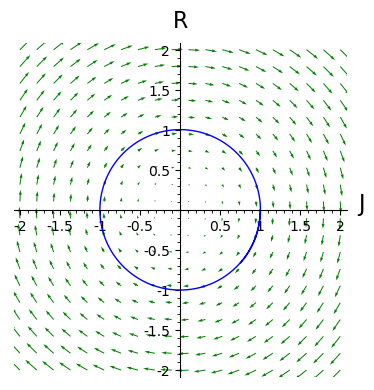

In [4]:
var("J,R")                  # make J and R symbolic variables
Jprime(J,R)=R               # formula for J'
Rprime(J,R)=-J              # formula for R'
tend=7.
dt=0.001
JRlist=Euler2D(Jprime,Rprime,1.,0.,tend,dt)
Jvals=JRlist[0]             # extracts the J values from JRlist
Rvals=JRlist[1]             # extracts the R values from JRlist
# make a vector field plot
pvf=plot_vector_field([Jprime,Rprime],(J,-2.,2.),(R,-2.,2.),color="green",axes_labels=["J","R"],frame=False,aspect_ratio=1)
## make a trajectory plot
ptr=list_plot(list(zip(Jvals,Rvals)),plotjoined=True,axes_labels=["J","R"],aspect_ratio=1)
## combine vector field and trajectory and show
show(pvf+ptr)

**Exercise 4.** Run the code for `Euler2D` above, then use it to plot a trajectory (for our SIR model) starting at the point from the previous exercise. Your time values should start at 0 days and go to 365 days in 1 day increments.

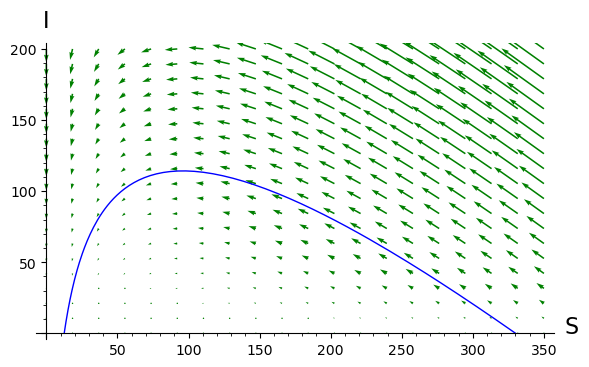

In [7]:
var("S,I") a=1/6 b=1/20 P0=330 I0=.0001 S0=330-I0 Sprime(S,I)=(-a*S*I)/P0 Iprime(S,I)=(a*S*I)/P0-b*I tend=365. dt=1. SIlist=Euler2D(Sprime,Iprime,330,.0001,tend,dt) Svals=SIlist[0] Ivals=SIlist[1] pvf1=plot_vector_field([Sprime,Iprime],(S,0,350),(I,0,200), color="green", axes_labels=["S","I"], frame=False, aspect_ratio=1) ptr1=list_plot(list(zip(Svals,Ivals)),  plotjoined=True, axes_labels=["S","I"], aspect_ratio=1) show(pvf1+ptr1)

We can bring trajectories to life using animations. Here is an example with Romeo and Juliet:

Animation with 32 frames
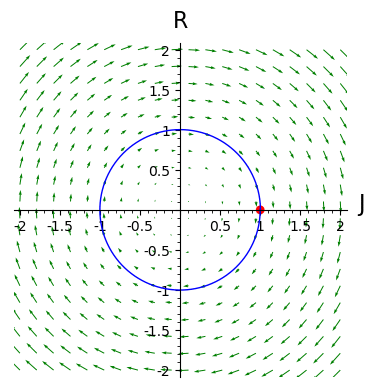

In [8]:
var("J,R")
Jprime(J,R)=R               # formula for J'
Rprime(J,R)=-J              # formula for R'
dt=0.001                    # time step
tend=2.*pi
JRlist=Euler2D(Jprime,Rprime,1.,0.,tend,dt)
tvals=srange(0.,tend,dt,include_endpoint=True)  # list of time values
Jvals=JRlist[0]             # extracts the J values from JRlist
Rvals=JRlist[1]             # extracts the R values from JRlist
pvf=plot_vector_field([Jprime(J,R),Rprime(J,R)],(J,-2.,2.),(R,-2.,2.),color="green",axes_labels=["J","R"],frame=False,aspect_ratio=1)# makes a vector field plot
## trajectory
ptr=list_plot(list(zip(Jvals,Rvals)),plotjoined=True,axes_labels=["J","R"],aspect_ratio=1)
list_frames=[]                     # creates a list for frames to go into
for j in srange(0,len(tvals),200): # loops going from 0 to  the number of time values in tvals skipping by 200 each time.
    pt=point([Jvals[j],Rvals[j]], color="red", size=40)  # plots the point at the j-th time value
    p=pvf+pt+ptr                   # combine into one plot
    list_frames.append(p)          # appends this plot to list_frames
ani=animate(list_frames)           # creates an animation from the list of plots
show(ani,iterations=3)             # displays the animation only repeat 3 times

Above we used the CoCalc function `len()` to find the length of a list. For example `len([4,7,3,-1])` will return 4 since the list has 4 elements in it.

**Exercise 5.** Make an animation showing the development of our trajectory for the pandemic over time.

(Hint: In line 13 of the previous example, notice that the for loop is going by increments of 200. We do this so that the code doesn't take forever to run. For this exercise you should go by increments of about 10.) If your animation is too long, Cocalc may give you a message about discarding intermediate output.  To deal with that reduce the number of frames by either increasing the increment, or reducing the length of time. (The ending time can be reduced below 365 days to 200 days or less)

Animation with 14 frames
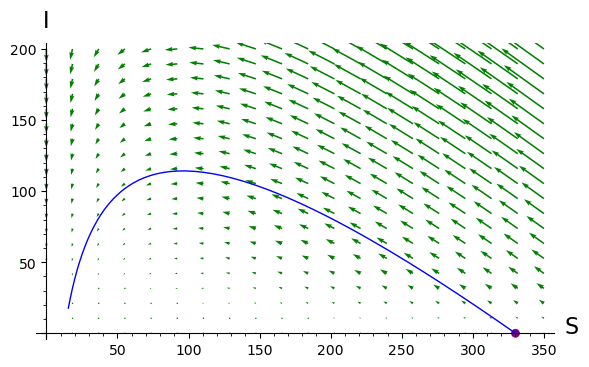

In [9]:
var("S,I") Sprime(S,I)=(-a*S*I)/P0 Iprime(S,I)=(a*S*I)/P0-b*I tend=200 dt=1. SIlist=Euler2D(Sprime,Iprime,330,.0001,tend,dt) tvals=srange(0.,tend,dt,include_endpoint=True) Svals=SIlist[0] Ivals=SIlist[1] pvf1=plot_vector_field([Sprime,Iprime],(S,0,350),(I,0,200), color="green", axes_labels=["S","I"], frame=False, aspect_ratio=1) ptr1=list_plot(list(zip(Svals,Ivals)),  plotjoined=True, axes_labels=["S","I"], aspect_ratio=1) list_frames1=[] for q in srange(0,tend,15):     pt=point([Svals[q],Ivals[q]], color="purple", size=40)     w=pt+pvf1+ptr1     list_frames1.append(w) ani1=animate(list_frames1) show(ani1, iterations=4)

We can tell stories to go along with trajectories. For example, here is a story that matches up with our Romeo and Juliet trajectory:

<em>
Romeo barely knew who Juliet was, but Juliet had a crush on Romeo.  Romeo found that annoying and began to avoid Juliet who responded to his rejection by backing off and being less interested in Romeo.  At a certain point, in fact, she began to dislike Romeo and made a point of dissing him.   Romeo perversely found that more attractive and he began to court Juliet and made a point of seeking her out and showing his attraction.  Juliet decided that Romeo was OK and began to respond to his interest with a renewed interest of her own.  This led to a cycle that repeated endlessly!
</em>



**Exercise 6.** In a comment, tell a story that matches up with our trajectory.

Note that unlike the Romeo and Juliet trajectory, the trajectory for the SIR model does not develop at the same rate everywhere (this can be seen from Exercise 5). When writing your story you should take this into account.

In [10]:
#100 people go to a huge party however at the party, the drinks have a virus in them and all 100 get sick. Those people, not knowing they are sick, go back to their regular lives unknowingly giving others the virus. This rate of infection temporarily increases at an exponential rate starting what is know as the outbreak. We see the rate at which people are infected begin to decrease until finally we reach max number of infected people. At this time there are much fewer suceptible people to get sick so we see the number of infected drop quickly. It contines to drop until the number of infected is zero, this meaning the virus can no longer be spread. From a real world point of view this cycle would most likely not repeat provided that the virus does not reappear